In [1]:
import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import math
import seaborn as sns
from scipy import stats as st
import os

In [2]:
t_ox = 300/1e3
eps = 3.4
eps0 = 8.85/1e18
Cq =  4/1e22
r = 0.001
dens_arr = np.arange(0.001, 40, 0.001)
C_norm = np.zeros((len(dens_arr)))
C_hard = np.zeros((len(dens_arr)))

for i in range(0, len(dens_arr)):
    
    C_norm[i] = eps*eps0/t_ox*1e9
    C_hard[i] = (Cq + 1/(math.pi*2*eps*eps0)*math.log(1/(r*dens_arr[i]*math.pi)*math.sinh(2*math.pi*t_ox*dens_arr[i])))**(-1)*dens_arr[i]*1e9

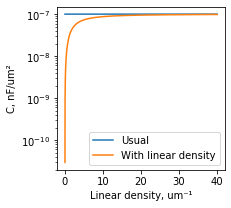

In [3]:
fig, ax = plt.subplots(figsize = (3,3))
plt.semilogy(dens_arr, C_norm, label = 'Usual')
plt.semilogy(dens_arr, C_hard, label = 'With linear density')
plt.xlabel('Linear density, um⁻\u00b9')
plt.ylabel('C, nF/um\u00b2')
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,1))
plt.legend()
plt.savefig('Capacitance graph normal.png', format = 'png', bbox_inches = 'tight', dpi = 600)

(array(6.474944), array(22.46617471))

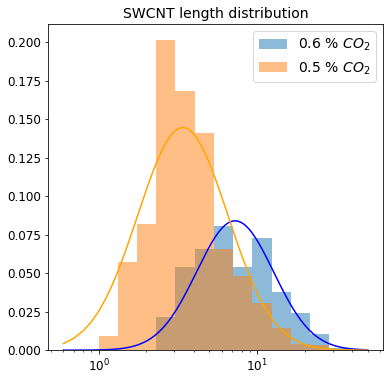

In [15]:
path1 = r'C:\Users\kpebe\OneDrive\Рабочий стол\For count\Results 1 regime.csv'
path2 = r'C:\Users\kpebe\OneDrive\Рабочий стол\For count\Results 2 regime.csv'
df1 = pd.read_csv(path1, engine = 'python', sep = ',')
df2 = pd.read_csv(path2, engine = 'python', sep = ',')
fig, ax = plt.subplots(figsize = (6,6))
ax.hist(np.array(df1['Length'], dtype = 'float'), density = True, 
        bins = np.logspace(np.log10(1e0),np.log10(5 * 1e1), 15), alpha = 0.5, label = '0.6 % $CO_{2}$')
ax.hist(np.array(df2['Length'], dtype = 'float'), density = True, 
        bins = np.logspace(np.log10(1e0),np.log10(5 * 1e1), 15), alpha = 0.5, label = '0.5 % $CO_{2}$')
params = st.lognorm.fit(df1['Length'], floc = 0)
ax.plot(np.arange(0.6, 50, 0.1), st.lognorm.pdf(np.arange(0.6, 50, 0.1), *params), color = 'blue')
params = st.lognorm.fit(df2['Length'], floc = 0)
ax.plot(np.arange(0.6, 50, 0.1), st.lognorm.pdf(np.arange(0.6, 50, 0.1), *params), color = 'orange')
ax.set_xscale('log')
ax.tick_params(axis = 'both', labelsize = 12)
ax.legend(fontsize = 14)
ax.set_title('SWCNT length distribution', fontsize = 14)
fig.savefig('Regime 1.png', format = 'png', bbox_inches = 'tight', dpi = 300)
st.lognorm(*params).stats()

In [62]:
len(df['Length'])

187

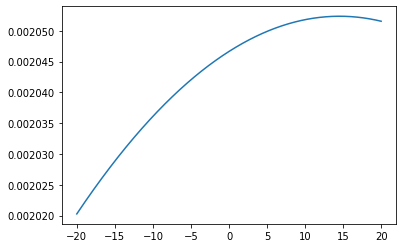

In [107]:
plt.plot(np.arange(-20,20,0.01),st.norm.pdf(np.arange(-20,20,0.01), loc = 14.51916542, scale = 37784**0.5))

In [103]:
np.median(st.norm.pdf(np.arange(-1000,1000,0.01), loc = 14.51916542, scale = 37784))

1.0557573350570057e-05

In [38]:
(st.lognorm.pdf(np.arange(1, 20, 0.001), 0.5251087985615228, -0.5503096691861848, 10.57440936245917)).std()

0.024328735203443693

In [11]:
# regimes = {'Regime_A': '0 (1)', 'Regime_B': '0 (2)', 'Regime_C': '0.02', 'Regime_D': '0.03', 'Regime_E':  '0.04', 'Regime_F': '0.035'}
path = r'C:\Users\kpebe\OneDrive\Рабочий стол\B3919'

for file in os.listdir(path):
    
    if 'Regime' in file and '.csv' in file:
        
        make_distplot(path + '\\' + file, file.split('.')[0])

In [10]:
def make_distplot(path, regime):

    df = pd.read_csv(path, engine = 'python', sep = ',')
    fig, ax = plt.subplots(figsize = (6,6))
    mmin = df['Length'][df['Length'] > 0].min()
    mmax = df['Length'][df['Length'] > 0].max()
    ax.hist(np.array(df['Length'], dtype = 'float'), color = 'b', density = True, 
            bins = np.logspace(np.log10(mmin),np.log10(mmax), int(np.log10(mmax/mmin)*10) + 1))
    params = st.lognorm.fit(df['Length'][df['Length'] > 0], floc = 0)
    ax.plot(np.arange(mmin/3, mmax*3, 0.1), st.lognorm.pdf(np.arange(mmin/3, mmax*3, 0.1), *params), c = 'red')
    ax.set_xscale('log')
    ax.tick_params(axis = 'both', labelsize = 12)
    ax.set_title('{} \n $G.Mean$ $=$ {} $\mu$$m,$ $SD$ $=$ {} $\mu$$m$ \n {} $counts$'.format(regime, 2, int(np.round(st.lognorm(*params).stats()[0], 0)), 
                                                                                 int(np.round((st.lognorm(*params).stats()[1] ** 0.5), 0)), 
                                                                                 len(df['Length'])), fontsize = 14)
    ax.set_xlabel('$Length,$ $\mu$$m$', fontsize = 14)
    fig.savefig(path.replace('.csv', '.png'), format = 'png', bbox_inches = 'tight', dpi = 300)
    plt.close(fig)
    st.lognorm(*params).stats()

In [44]:
np.mean(st.lognorm.cdf(np.arange(1, 20, 0.1), 0.8131917668542937, 0.859659107337317, 4.1219996596238175))

0.7157873909448121

In [34]:
st.lognorm.pdf(np.arange(1, 20, 0.1), 0.8131917668542937, 4.1219996596238175, 0.859659107337317)

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.08104388e-02, 4.22651428e-01, 6.73251379e-01, 7.79007969e-01,
       7.90989286e-01, 7.53432577e-01, 6.93397540e-01, 6.25844015e-01,
       5.58568011e-01, 4.95354160e-01, 4.37801846e-01, 3.86350066e-01,
       3.40845523e-01, 3.00854832e-01, 2.65833942e-01, 2.35217909e-01,
       2.08466324e-01, 1.85084177e-01, 1.64629341e-01, 1.46712976e-01,
       1.30996380e-01, 1.17186286e-01, 1.05029675e-01, 9.43086805e-02,
      

In [3]:
import scipy.stats as st
def get_best_distribution(data):
    
    dist_results = []
    params = {}
    for dist_name in dist_names:
        
    dist = st.lognorm
    param = dist.fit(data)

    params['lognorm'] = param
        # Applying the Kolmogorov-Smirnov test
    D, p = st.kstest(data, dist_name, args=param)
    print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_p, params[best_dist]

get_best_distribution(df['Length'])

IndentationError: expected an indented block (<ipython-input-3-27371451289f>, line 8)

In [13]:
st.lognorm.fit(df['Length'])

(0.5251087985615228, -0.5503096691861848, 10.57440936245917)

(array(10.64700816), array(143.11651331))

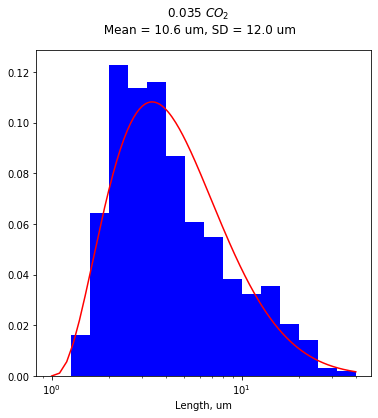

In [25]:
path = r'C:\Users\kpebe\OneDrive\Рабочий стол\For count\Results 3 regime.csv'
df = pd.read_csv(path, engine = 'python', sep = ',')
fig, ax = plt.subplots(figsize = (6,6))
ax.hist(np.array(df['Length'], dtype = 'float'), color = 'b', density = True, 
        bins = np.logspace(np.log10(1e0),np.log10(4 * 1e1), 17))
params = st.lognorm.fit(df['Length'])
ax.plot(np.arange(1, 40, 0.1), st.lognorm.pdf(np.arange(1, 40, 0.1), *params), c = 'red')
ax.set_xscale('log')
fig.suptitle('0.035 $CO_{}$ \n Mean = {} um, SD = {} um'.format(2, np.round(st.lognorm(*params).stats()[0], 1), 
                                                                np.round((st.lognorm(*params).stats()[1] ** 0.5), 1)))
ax.set_xlabel('Length, um')
fig.savefig('Regime 3.png', format = 'png', bbox_inches = 'tight', dpi = 300)
st.lognorm(*params).stats()

In [3]:
st.lognorm.fit(df['Length'])

(0.9629968970766822, 0.9685380887820001, 6.087407701452393)

(array(5.24447752), array(23.03192261))

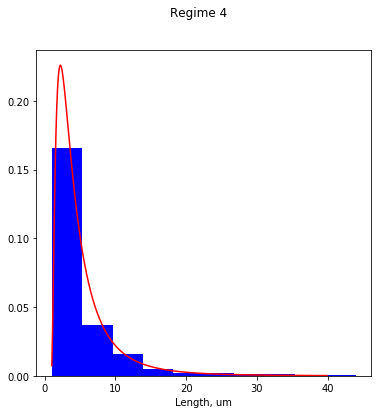

In [155]:
path = r'C:\Users\kpebe\OneDrive\Рабочий стол\For count\Results 4 regime.csv'
df = pd.read_csv(path, engine = 'python', sep = ',')
fig, ax = plt.subplots(figsize = (6,6))
ax.hist(np.array(df['Length'], dtype = 'float'), color = 'b', density = True)
params = st.lognorm.fit(df['Length'])
ax.plot(np.arange(1, 40, 0.1), st.lognorm.pdf(np.arange(1, 40, 0.1), *params), c = 'red')
# ax.set_xscale('log')
fig.suptitle('Regime 4')
ax.set_xlabel('Length, um')
fig.savefig('Regime 4.png', format = 'png', bbox_inches = 'tight', dpi = 300)
st.lognorm(*params).stats()

In [7]:
st.lognorm.fit(df['Length'])

(0.8887184071032839, 0.8689325923575961, 2.947981986095825)

(array(8.69333113), array(57.47549054))

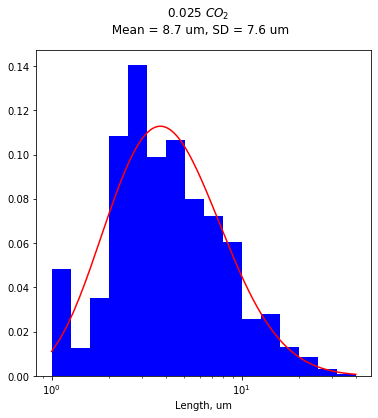

In [26]:
path = r'C:\Users\kpebe\OneDrive\Рабочий стол\For count\Results 5 regime.csv'
df = pd.read_csv(path, engine = 'python', sep = ',')
fig, ax = plt.subplots(figsize = (6,6))
ax.hist(np.array(df['Length'], dtype = 'float'), color = 'b', density = True, 
        bins = np.logspace(np.log10(1e0),np.log10(4 * 1e1), 17))
params = st.lognorm.fit(df['Length'])
ax.plot(np.arange(1, 40, 0.1), st.lognorm.pdf(np.arange(1, 40, 0.1), *params), c = 'red')
ax.set_xscale('log')
fig.suptitle('0.025 $CO_{}$ \n Mean = {} um, SD = {} um'.format(2, np.round(st.lognorm(*params).stats()[0], 1), 
                                                                np.round((st.lognorm(*params).stats()[1] ** 0.5), 1)))
ax.set_xlabel('Length, um')
fig.savefig('Regime 5.png', format = 'png', bbox_inches = 'tight', dpi = 300)
st.lognorm(*params).stats()

In [3]:
st.lognorm.fit(df['Length'])

(0.7771700528139625, 0.3688568660616337, 6.1546213368361125)

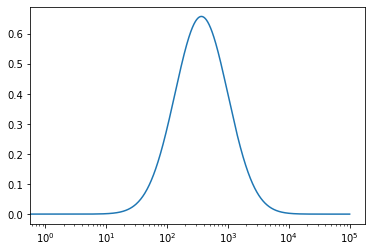

In [76]:
plt.plot(st.lognorm.pdf(np.arange(0.001,100,0.001), s = 1))
plt.xscale('log')

In [4]:
a = ['1', '2', '3']
list(map(float, a))

[1.0, 2.0, 3.0]